In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('src/forex.csv')

In [22]:
df.index = pd.to_datetime(df.date)
df = df.drop(columns=['date'])
df_GBP2EGP = df[df.slug == 'GBP/EGP'].copy()
df_GBP2EGP = df_GBP2EGP.sort_index()

In [23]:
df_GBP2EGP = df_GBP2EGP[~df_GBP2EGP.index.year.isin([2001, 2002, 2003])]
df_GBP2EGP_filled = df_GBP2EGP.resample('D').ffill()

In [24]:
df_GBP2EGP_filled

,slug,open,high,low,close,currency
date,,,,,,
2004-02-13,GBP/EGP,11.607000,11.642000,11.520000,11.578000,EGP
2004-02-14,GBP/EGP,11.607000,11.642000,11.520000,11.578000,EGP
2004-02-15,GBP/EGP,11.607000,11.642000,11.520000,11.578000,EGP
2004-02-16,GBP/EGP,11.571000,11.623000,11.499000,11.607000,EGP
2004-02-17,GBP/EGP,11.608000,11.739000,11.521000,11.662000,EGP
...,...,...,...,...,...,...
2021-08-26,GBP/EGP,21.582624,21.606640,21.387648,21.582624,EGP
2021-08-27,GBP/EGP,21.482306,21.601389,21.340832,21.482431,EGP
2021-08-28,GBP/EGP,21.482306,21.601389,21.340832,21.482431,EGP


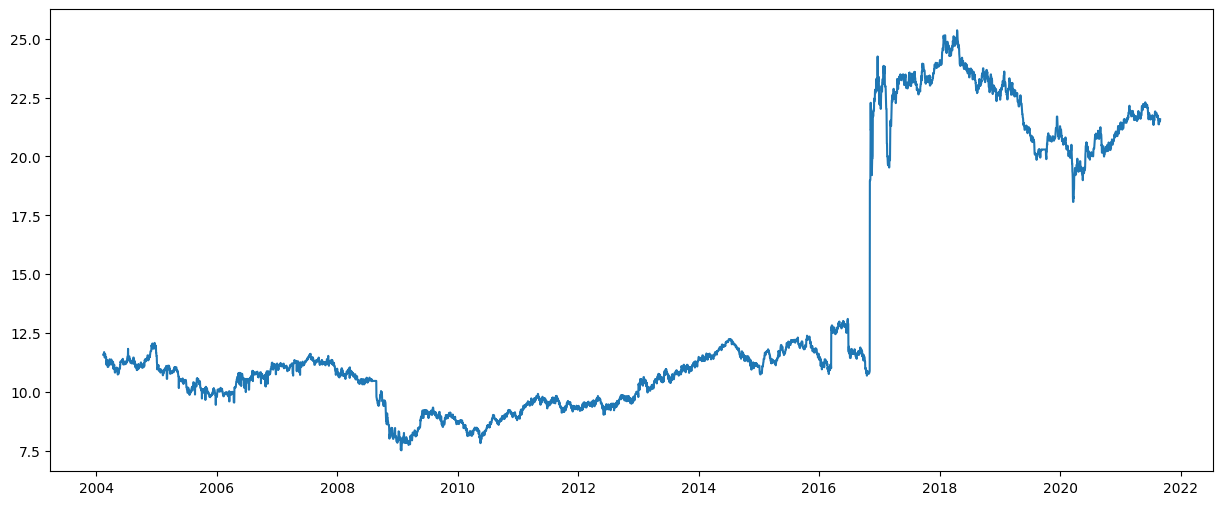

In [25]:
plt.figure(figsize=(15, 6))

plt.plot(df_GBP2EGP_filled.index, df_GBP2EGP_filled.close)

In [35]:
df_ge = df_GBP2EGP_filled.drop(columns=['slug', 'currency']).copy()

In [134]:
def create_features(df):
    df = df.copy()

    df['day_of_week'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['day_of_year'] = df.index.dayofyear

    lags = [7, 14, 28]
    for lag in lags:
        df[f'lag_{lag}'] = df['close'].shift(lag)

    windows = [7, 14, 28]
    for window in windows:
        df[f'rolling_mean_{window}'] = df.close.shift(1).rolling(window=window).mean()
        df[f'rolling_std_{window}'] = df.close.shift(1).rolling(window=window).std()

    return df

In [135]:
df_features = create_features(df_ge)
df_features = df_features.dropna()

In [136]:
df_features

,open,high,low,close,day_of_week,quarter,month,year,day_of_year,lag_7,lag_14,lag_28,rolling_mean_7,rolling_std_7,rolling_mean_14,rolling_std_14,rolling_mean_28,rolling_std_28
date,,,,,,,,,,,,,,,,,,
2004-03-12,11.056000,11.151400,11.018000,11.066000,4,1,3,2004,72,11.354000,11.459000,11.578000,11.267714,0.134071,11.314429,0.139226,11.435036,0.165270
2004-03-13,11.056000,11.151400,11.018000,11.066000,5,1,3,2004,73,11.354000,11.459000,11.578000,11.226571,0.146767,11.286357,0.147224,11.416750,0.176790
2004-03-14,11.056000,11.151400,11.018000,11.066000,6,1,3,2004,74,11.354000,11.459000,11.578000,11.185429,0.145453,11.258286,0.149227,11.398464,0.185745
2004-03-15,11.043000,11.175200,11.028000,11.075000,0,1,3,2004,75,11.344000,11.480000,11.607000,11.144286,0.129703,11.230214,0.145483,11.380179,0.192496
2004-03-16,11.074000,11.224500,11.066000,11.186900,1,1,3,2004,76,11.323000,11.317000,11.662000,11.105857,0.096190,11.201286,0.131597,11.361179,0.195510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26,21.582624,21.606640,21.387648,21.582624,3,3,8,2021,238,21.552210,21.743135,21.799400,21.436469,0.088187,21.552879,0.141564,21.683630,0.171939
2021-08-27,21.482306,21.601389,21.340832,21.482431,4,3,8,2021,239,21.367914,21.653427,21.907093,21.440814,0.095302,21.541414,0.131082,21.675888,0.171413
2021-08-28,21.482306,21.601389,21.340832,21.482431,5,3,8,2021,240,21.367914,21.653427,21.907093,21.457174,0.090406,21.529200,0.127767,21.660722,0.168968


In [137]:
FEATURES = [col for col in df_features.columns if col != 'close']
TARGET = 'close'

In [138]:
X = df_features[FEATURES]
y = df_features[TARGET]

In [61]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [139]:
val_days = 100
test_days = 28

end_date = df_features.index.max()
test_split_date = end_date - pd.Timedelta(days=test_days)
val_split_date = test_split_date - pd.Timedelta(days=val_days)

X_train = X[X.index < val_split_date]
y_train = y[y.index < val_split_date]

mask_val = (X.index >= val_split_date) & (X.index < test_split_date)
X_val = X[mask_val]
y_val = y[mask_val]

X_test = X[X.index >= test_split_date]
y_test = y[y.index >= test_split_date]

Text(0.5, 1.0, 'Разбиение данных')

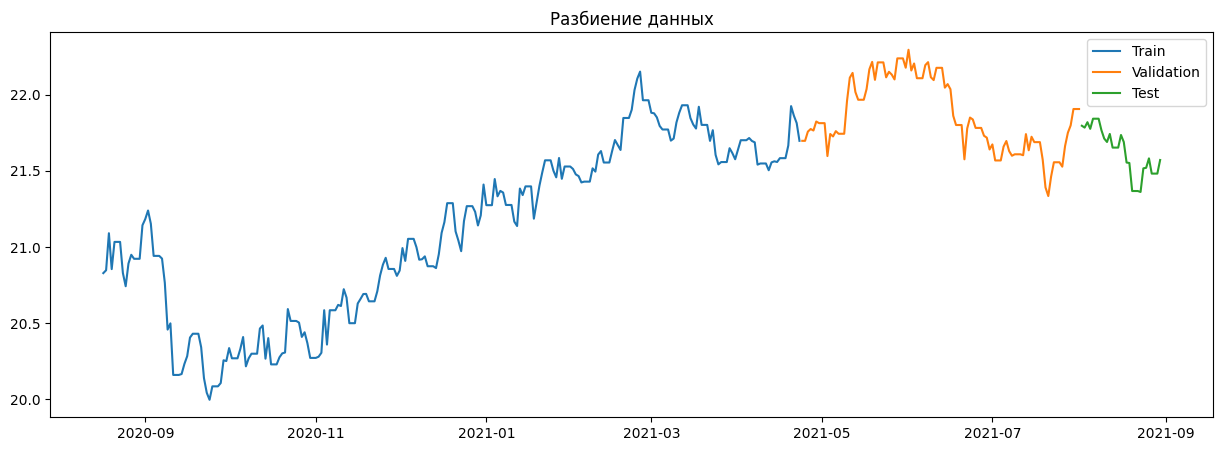

In [140]:
plt.figure(figsize=(15, 5))
plt.plot(y_train.index[-250:], y_train[-250:], label='Train')
plt.plot(y_val.index, y_val, label='Validation')
plt.plot(y_test.index, y_test, label='Test')
plt.legend()
plt.title('Разбиение данных')

In [141]:
reg = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    early_stopping_rounds=50, 
    objective='reg:squarederror'
)

reg.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=100
)

[0]	validation_0-rmse:5.22114	validation_1-rmse:8.32906


[100]	validation_0-rmse:1.92147	validation_1-rmse:3.07452
[200]	validation_0-rmse:0.70904	validation_1-rmse:1.13998
[300]	validation_0-rmse:0.26548	validation_1-rmse:0.42927
[400]	validation_0-rmse:0.10767	validation_1-rmse:0.17256
[500]	validation_0-rmse:0.05810	validation_1-rmse:0.08448
[600]	validation_0-rmse:0.04603	validation_1-rmse:0.05849
[700]	validation_0-rmse:0.04267	validation_1-rmse:0.05192
[800]	validation_0-rmse:0.04117	validation_1-rmse:0.05017
[900]	validation_0-rmse:0.03960	validation_1-rmse:0.04969
[999]	validation_0-rmse:0.03832	validation_1-rmse:0.04955


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,None


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

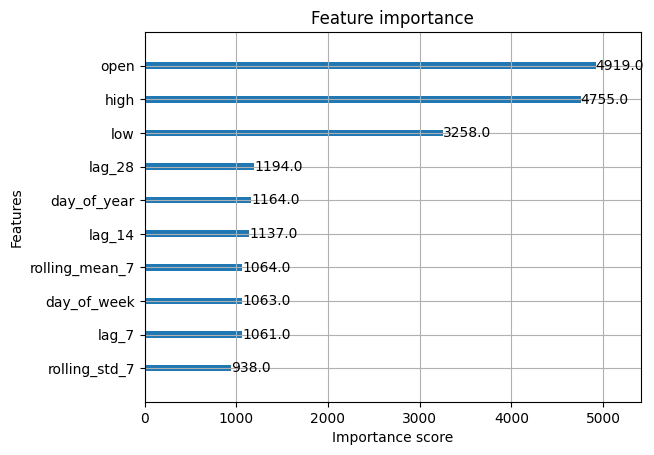

In [142]:
xgb.plot_importance(reg, max_num_features=10)

In [143]:
prediction = reg.predict(X_test)

result = pd.DataFrame({'prediction_close': prediction}, index=y_test.index)

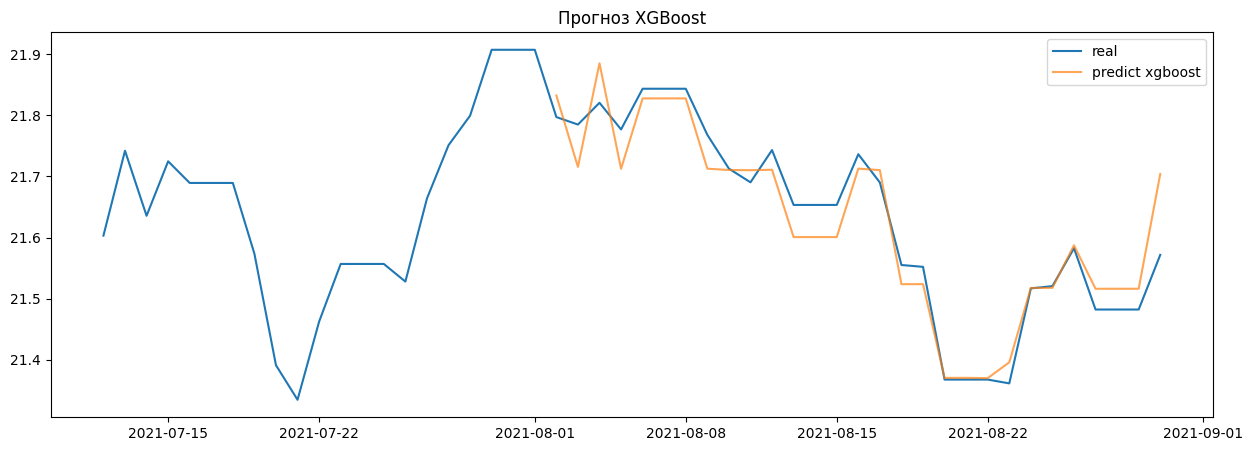

In [144]:
plt.figure(figsize=(15, 5))
plt.plot(df_features.index[-50:], df_features.close[-50:], label='real')
plt.plot(result.index, result.prediction_close, label='predict xgboost', alpha=0.7)
plt.title('Прогноз XGBoost')
plt.legend()

In [145]:
rmse = np.sqrt(mean_squared_error(y_test, prediction))
mape = mean_absolute_percentage_error(y_test, prediction)

print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4%}")

RMSE: 0.0427
MAPE: 0.1491%


____

In [146]:
df_diff = df_features.copy()
df_diff['target_diff'] = df_diff['close'].diff()

df_diff = df_diff.dropna()

X_diff = df_diff[FEATURES]
y_diff = df_diff['target_diff']

In [147]:
end_date_d = df_diff.index.max()
test_split_date_d = end_date_d - pd.Timedelta(days=test_days)
val_split_date_d = test_split_date_d - pd.Timedelta(days=val_days)

X_train_d = X_diff[X_diff.index < val_split_date_d]
y_train_d = y_diff[y_diff.index < val_split_date_d]

mask_val_d = (X_diff.index >= val_split_date_d) & (X_diff.index < test_split_date_d)
X_val_d = X_diff[mask_val_d]
y_val_d = y_diff[mask_val_d]

X_test_d = X_diff[X_diff.index >= test_split_date_d]
y_test_d = y_diff[y_diff.index >= test_split_date_d]

In [148]:
reg_diff = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    early_stopping_rounds=50,
    objective='reg:squarederror'
)

In [149]:
reg_diff.fit(
    X_train_d, y_train_d,
    eval_set=[(X_train_d, y_train_d), (X_val_d, y_val_d)],
    verbose=100
)

[0]	validation_0-rmse:0.14928	validation_1-rmse:0.08157
[100]	validation_0-rmse:0.12266	validation_1-rmse:0.07923
[200]	validation_0-rmse:0.11288	validation_1-rmse:0.07885
[256]	validation_0-rmse:0.10767	validation_1-rmse:0.07911


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,None


In [150]:
pred_diffs = reg_diff.predict(X_test_d)

prev_close = df_features['close'].shift(1).loc[y_test_d.index]

last_train_close = df_features.loc[X_train_d.index[-1], 'close']
prev_close.iloc[0] = last_train_close

pred_prices_reconstructed = prev_close + pred_diffs

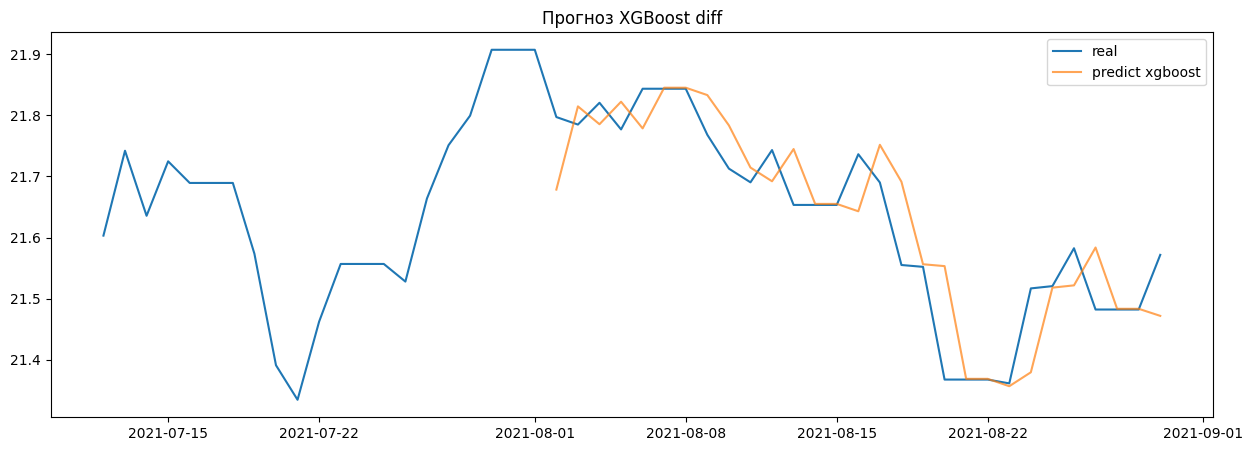

In [151]:
plt.figure(figsize=(15, 5))
plt.plot(df_features.index[-50:], df_features.close[-50:], label='real')
plt.plot(pred_prices_reconstructed.index, pred_prices_reconstructed, label='predict xgboost', alpha=0.7)
plt.title('Прогноз XGBoost diff')
plt.legend()

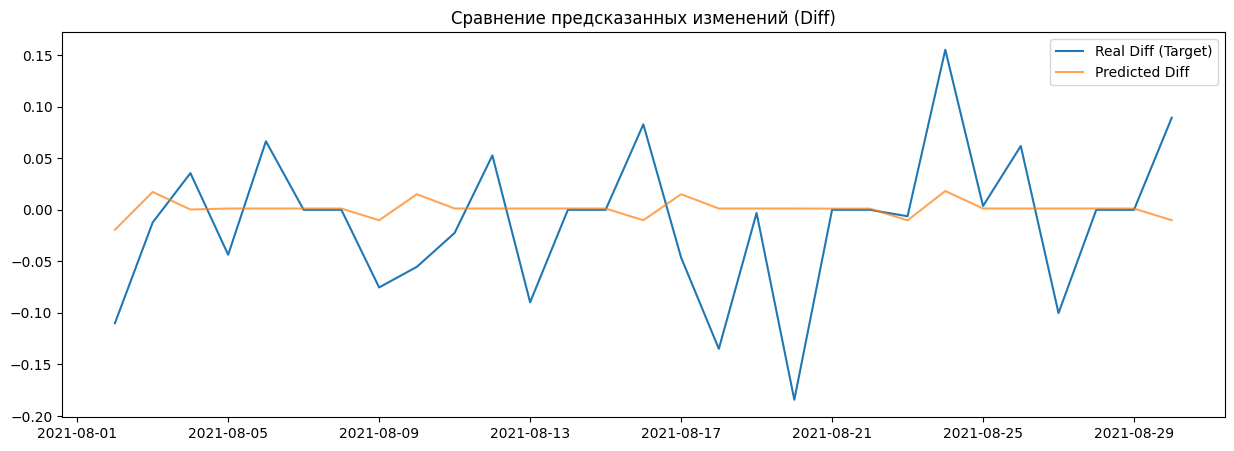

In [133]:
plt.figure(figsize=(15, 5))
plt.plot(y_test_d.index, y_test_d, label='Real Diff (Target)')
plt.plot(y_test_d.index, pred_diffs, label='Predicted Diff', alpha=0.7)
plt.title('Сравнение предсказанных изменений (Diff)')
plt.legend()

_____

In [152]:
df_target = df_GBP2EGP_filled
data = pd.DataFrame(df_target.close)

In [153]:
data['log_ret'] = np.log(data.close / data.close.shift(1))

In [154]:
def compute_rsi(series, window):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

In [ ]:
data['sma_14'] = data['close'].rolling(window=14).mean()
data['sma_30'] = data['close'].rolling(window=30).mean()

data['dist_sma_14'] = data['close'] / data['sma_14'] - 1
data['dist_sma_30'] = data['close'] / data['sma_30'] - 1

data['rsi_14'] = compute_rsi(data['close'], 14)

lags = [1, 2, 3, 5, 10, 20]
for lag in lags:
    data[f'lag_ret_{lag}'] = data['log_ret'].shift(lag)

data['volatility_7'] = data['log_ret'].rolling(window=7).std()

data.dropna(inplace=True)

In [157]:
features = [col for col in data.columns if col not in ['close', 'log_ret', 'sma_14', 'sma_30']]
target = 'log_ret'

X_l = data[features]
y_l = data[target]

In [161]:
end_date_l = data.index.max()
test_split_date_l = end_date_l - pd.Timedelta(days=test_days)
val_split_date_l = test_split_date_l - pd.Timedelta(days=val_days)

X_train_l = X_l[X_l.index < val_split_date_l]
y_train_l = y_l[y_l.index < val_split_date_l]

mask_val_l = (X_l.index >= val_split_date_l) & (X_l.index < test_split_date_l)
X_val_l = X_l[mask_val_l]
y_val_l = y_l[mask_val_l]

X_test_l = X_l[X_l.index >= test_split_date_l]
y_test_l = y_l[y_l.index >= test_split_date_l]

In [203]:
reg_l = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.001,
    max_depth=4,
    subsample=0.7,         
    colsample_bytree=0.7,  
    objective='reg:squarederror'
)

In [204]:
reg_l.fit(
    X_train_l, y_train_l,
    eval_set=[(X_train_l, y_train_l), (X_val_l, y_val_l)],
    verbose=100)

[0]	validation_0-rmse:0.01080	validation_1-rmse:0.00374


[100]	validation_0-rmse:0.01048	validation_1-rmse:0.00367
[200]	validation_0-rmse:0.01018	validation_1-rmse:0.00361
[300]	validation_0-rmse:0.00989	validation_1-rmse:0.00356
[400]	validation_0-rmse:0.00962	validation_1-rmse:0.00351
[500]	validation_0-rmse:0.00939	validation_1-rmse:0.00347
[600]	validation_0-rmse:0.00916	validation_1-rmse:0.00343
[700]	validation_0-rmse:0.00892	validation_1-rmse:0.00340
[800]	validation_0-rmse:0.00873	validation_1-rmse:0.00337
[900]	validation_0-rmse:0.00855	validation_1-rmse:0.00334
[999]	validation_0-rmse:0.00836	validation_1-rmse:0.00331


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [205]:
pred_log_ret = reg.predict(X_test_l)

In [206]:
prev_close_for_test = data['close'].shift(1).loc[y_test_l.index]
pred_price = prev_close_for_test * np.exp(pred_log_ret)

real_price = data.loc[y_test_l.index, 'close']

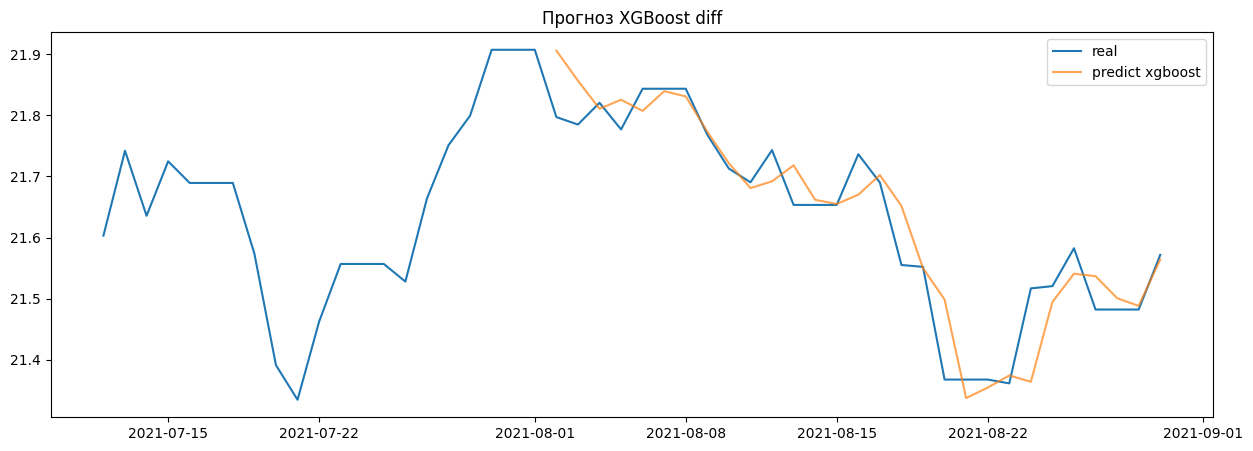

In [207]:
plt.figure(figsize=(15, 5))
plt.plot(df_features.index[-50:], df_features.close[-50:], label='real')
plt.plot(pred_price.index, pred_price, label='predict xgboost', alpha=0.7)
plt.title('Прогноз XGBoost diff')
plt.legend()

In [208]:
rmse = np.sqrt(mean_squared_error(real_price, pred_price))
mape = mean_absolute_percentage_error(real_price, pred_price)

print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4%}")

RMSE: 0.0555
MAPE: 0.1774%


____

In [227]:
horizons = [7, 14, 21, 28]

test_size_days = 100
split_date = data.index[-test_size_days]

features = [c for c in data.columns if c not in ['close', 'log_ret_1d']]

results_metrics = []

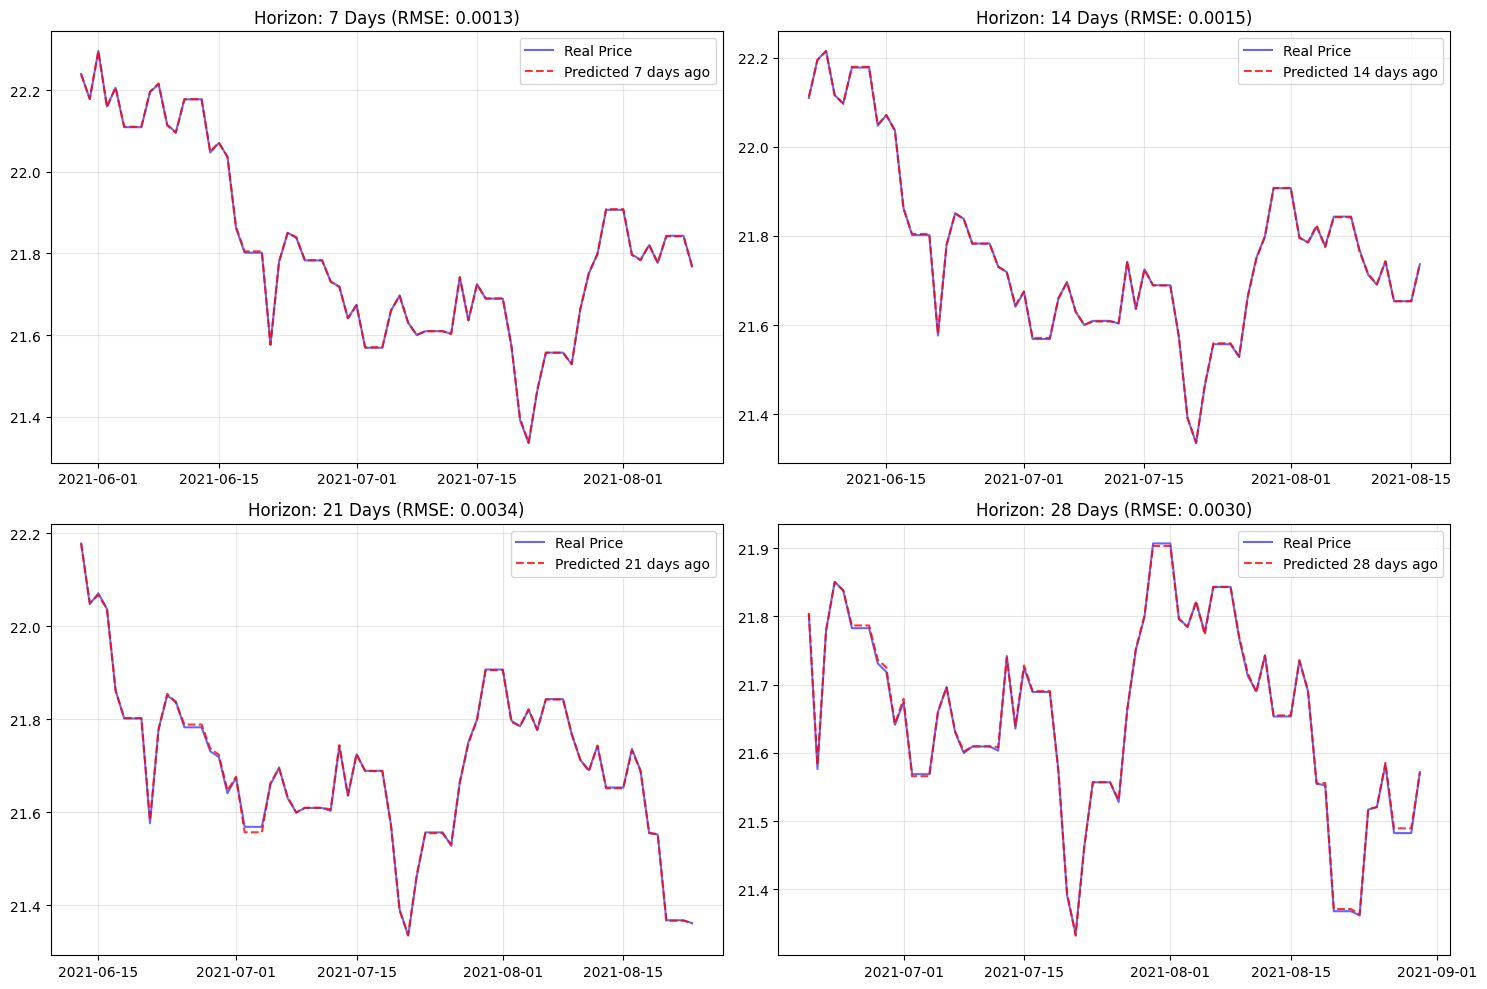

In [229]:
plt.figure(figsize=(15, 10))

for i, h in enumerate(horizons):
    col_target = f'target_{h}d'
    data[col_target] = np.log(data['close'].shift(-h) / data['close'])
    data_h = data.dropna(subset=features + [col_target]).copy()
    
    X = data_h[features]
    y = data_h[col_target]
    
    X_train = X[X.index < split_date]
    y_train = y[y.index < split_date]
    
    X_test = X[X.index >= split_date]
    y_test = y[y.index >= split_date]
    
    model = xgb.XGBRegressor(
        n_estimators=300, max_depth=4, learning_rate=0.02,
        objective='reg:squarederror', random_state=42
    )
    model.fit(X_train, y_train)
    
    pred_log_ret = model.predict(X_test)
    
    current_prices = data.loc[X_test.index, 'close']
    
    pred_prices_future = current_prices * np.exp(pred_log_ret)
    
    pred_dates = X_test.index + pd.Timedelta(days=h)
    
    real_prices_future = data.loc[data.index.isin(pred_dates), 'close']
    
    df_eval = pd.DataFrame({
        'date_prediction_made': X_test.index,
        'date_target': pred_dates,
        'pred_price': pred_prices_future.values
    }).set_index('date_target')
    
    df_eval['real_price'] = data['close']
    df_eval = df_eval.dropna() 
    
    rmse = np.sqrt(mean_squared_error(df_eval['real_price'], df_eval['pred_price']))
    results_metrics.append({'Horizon': h, 'RMSE': rmse})
    
    ax = plt.subplot(2, 2, i+1)
    
    ax.plot(df_eval.index, df_eval['real_price'], label='Real Price', color='blue', alpha=0.6)
    
    ax.plot(df_eval.index, df_eval['pred_price'], label=f'Predicted {h} days ago', color='red', alpha=0.8, linestyle='--')
    
    ax.set_title(f'Horizon: {h} Days (RMSE: {rmse:.4f})')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()